# Data Exploration

In [1]:
# importing libraries 
import pandas as pd

#mysql tool kit
import pymysql # adapter
from sqlalchemy import create_engine

In [2]:
df = pd.read_csv('Walmart.csv', encoding_errors='ignore')

In [3]:
df.shape

(10051, 11)

In [4]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [5]:
df.describe()


,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


insights: 

unit price must be changed int for calculation purposes
31 missing figures in unit price and quantity columns 

In [7]:
# searching for totall number of duplicates 

df.duplicated().sum()

np.int64(51)

In [8]:
# searching for totall number of nulls
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [9]:
df.drop_duplicates(inplace= True)

In [10]:
df.shape

(10000, 11)

In [11]:
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [12]:
# dropping all rows missing values
df.dropna(inplace=True)


In [13]:
df.isnull().sum()

invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

In [14]:
df.shape

(9969, 11)

In [15]:
# converting the datatype for Unit price column from string to float
df.dtypes

invoice_id          int64
Branch             object
City               object
category           object
unit_price         object
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

In [16]:
df['unit_price'] = df['unit_price'].str.replace('$', ' ').astype(float)

In [17]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      9969 non-null   int64  
 1   Branch          9969 non-null   object 
 2   City            9969 non-null   object 
 3   category        9969 non-null   object 
 4   unit_price      9969 non-null   float64
 5   quantity        9969 non-null   float64
 6   date            9969 non-null   object 
 7   time            9969 non-null   object 
 8   payment_method  9969 non-null   object 
 9   rating          9969 non-null   float64
 10  profit_margin   9969 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 934.6+ KB


In [19]:
# creating  a total price column 
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

In [20]:
df['total'] = df['unit_price'] * df['quantity']

In [21]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


In [22]:
df.columns = df.columns.str.lower()

In [23]:
df.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total'],
      dtype='object')

# connecting to the database

In [24]:
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path=".env")  # replace with actual path


# Read credentials from environment
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("MYSQL_DB")



In [25]:
df.to_csv('Walmart_cleandata.csv', index = False )

In [26]:
engine_mysql = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}")

try:
    engine_mysql
    print("Successfully Connected to Mysql")
except:
    print("Unable to connect")

Successfully Connected to Mysql


In [27]:
df.to_sql(name='Walmart', con =engine_mysql, if_exists= 'append', index=False)

9969

In [28]:
df.shape

(9969, 12)

In [29]:
df.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total'],
      dtype='object')

# DATA VISUALISATION

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


/var/folders/tm/vcz7ypds6b5gpns5q4zj32bc0000gn/T/ipykernel_53488/2370643634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="Blues_d")


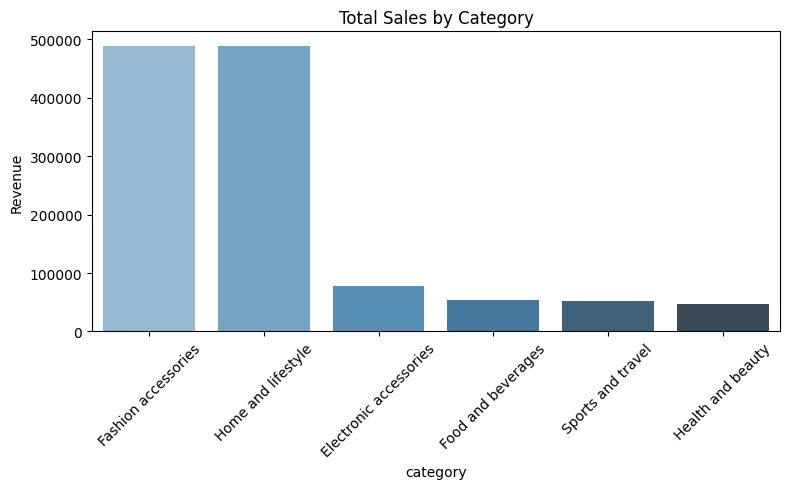

In [32]:
category_sales = df.groupby("category")["total"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="Blues_d")
plt.title("Total Sales by Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

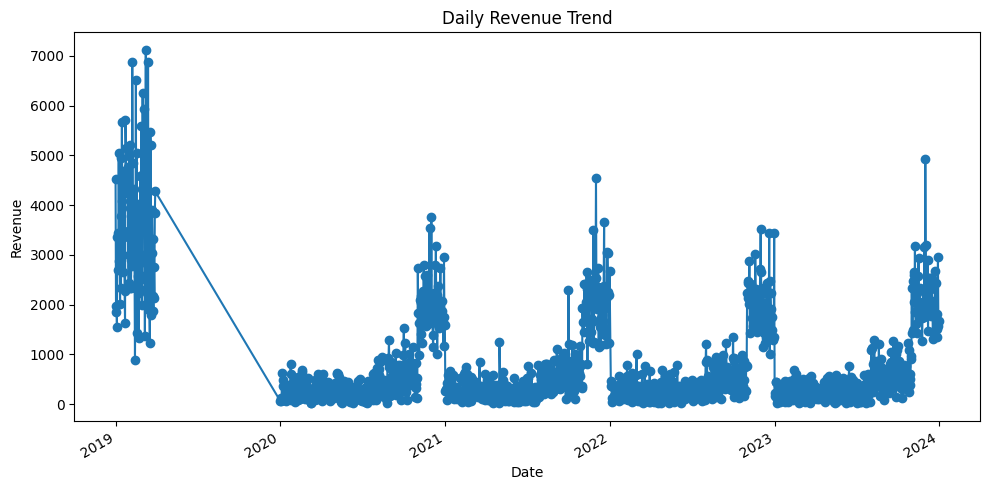

In [33]:
#  revenue trend over time
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%y")
daily_revenue = df.groupby("date")["total"].sum()
plt.figure(figsize=(10,5))
daily_revenue.plot(kind="line", marker="o")
plt.title("Daily Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

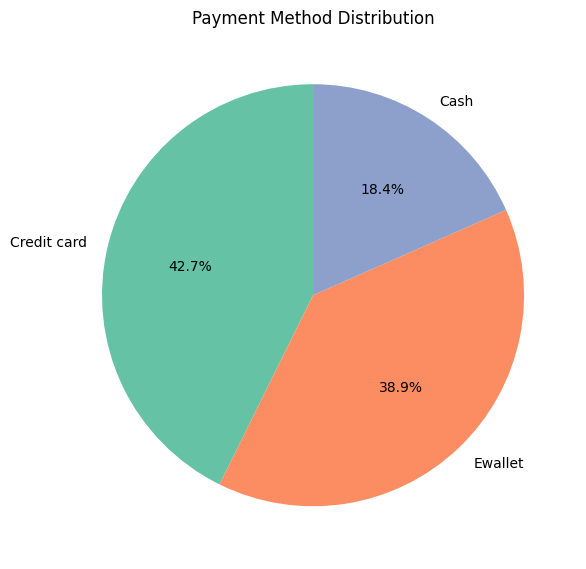

In [34]:
# payment method distribution
plt.figure(figsize=(6,6))
df["payment_method"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=sns.color_palette("Set2"))
plt.ylabel("")
plt.title("Payment Method Distribution")
plt.tight_layout()
plt.show()


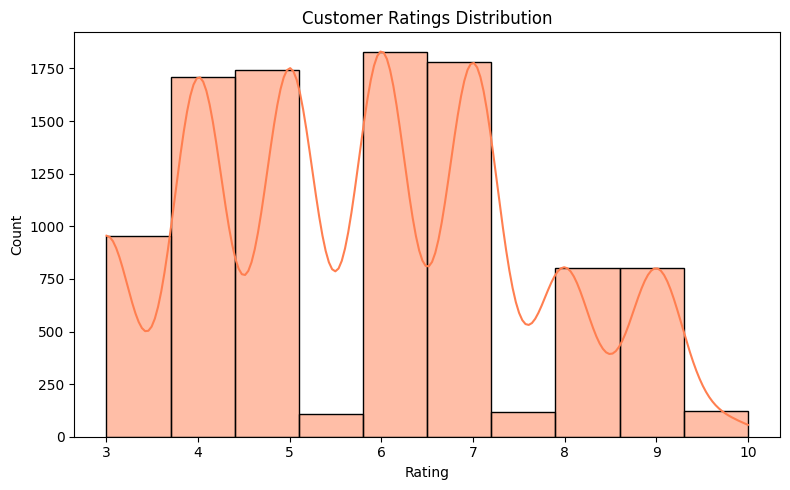

In [36]:
#  Customer ratings distribution
plt.figure(figsize=(8,5))
sns.histplot(df["rating"], bins=10, kde=True, color="coral")
plt.title("Customer Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()